In [38]:
%matplotlib inline

import numpy as np
import math

from numpy.fft import fftshift, fft2
from scipy.signal import convolve2d
from skimage.io import imshow, imread, imsave
from skimage.color import rgb2gray
from typing import List

In [18]:
def get_gauss(sigma: float=1.):
    diam = round(sigma * 6) + 1
    rad = diam // 2
    kernel = np.ndarray(shape=(diam, diam), dtype=np.float64)
    for x in range(-rad, rad + 1):
        for y in range(-rad, rad +1):
            gauss_value = (1 / (2 * math.pi * sigma ** 2)) * math.pow(math.e, ((-x ** 2 - y ** 2) / (2 * sigma ** 2)))
            kernel[x + rad, y + rad] = gauss_value
    S = sum(sum(kernel))
    kernel = kernel / S
    return kernel

In [36]:
def build_gauss_pyramid(img, sigma: float=1., n_layers: int=5) -> List:
    pyramid = []
    kernel = get_gauss(sigma)
    current_img = img
    for _ in range(n_layers):
        gaussian_img = convolve2d(current_img, kernel, mode='full', boundary='symm')
        pyramid.append(gaussian_img)
        current_img = gaussian_img
    return pyramid


In [46]:
img = imread('img.png')
img = rgb2gray(img)
pyramid = build_gauss_pyramid(img)
for i in range(len(pyramid)):
    freq = np.log(1 + abs(fftshift(fft2(pyramid[i]))))
    imsave(f'img_{i}', freq)

ValueError: Could not find a format to write the specified file in single-image mode

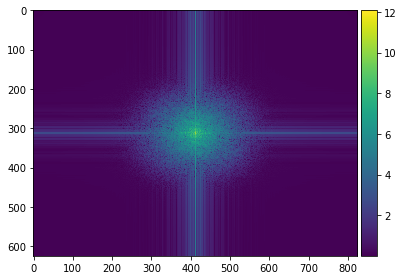

In [53]:
img = np.log(1 + abs(fftshift(fft2(pyramid[3]))))
imshow(img)